# Final project : Data analysis

Final project : business view

link of the dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

- Predict the quality of the wine in a scale of 0 - 10.
- Predict wether if it is going to be a red or a white wine.
- Make a wine recommender based on taste.

Problems ecounter during the process :

- Not enough data at some point, around 6500 rows
- The dataset was saying having a quality on a range of 1 to 10 but it appears that it goes from 3 to 9 only.
- merging white and red dataset was not a good idea, in my opinion. It didnt work because the characteristics that define a good white and red wine are different

## Objective 

Help winemakers to determine the quality of their wine during the process so they can make adjustements.

# Importing the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from scipy import stats


# df_r is the red wine dataset
# df_w is the white wine dataset


df_r = pd.read_excel('/Users/accountmanager/Desktop/Iron Hack/Final project/winequality-red.xls')
df_w = pd.read_excel('/Users/accountmanager/Desktop/Iron Hack/Final project/winequality-white.xls')

In [2]:
df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# First merge the 2 datasets but we need to add a column first to say wether the wine is red or white

df_r['type'] = 'red'
df_w['type'] = 'white'
df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [4]:
df = [df_r, df_w]
df = pd.concat(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
# We don't need much data cleaning here except maybe in the titles of the columns

df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [6]:
# There are no nul values

df.isnull().values.any()

False

In [7]:
# every columns has a good type

df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

# EDA

In [8]:
df.describe()

# We can already see a high difference in certain columns which might be outliers. 
# In residual sugar or free_sulfur_dioxide for exemple.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.corr()

# surprisingly, alcohol has the strongest correlation with the quality.
# we can also notice some logic facts such as the density which is high when there is a lot of sugar inside

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


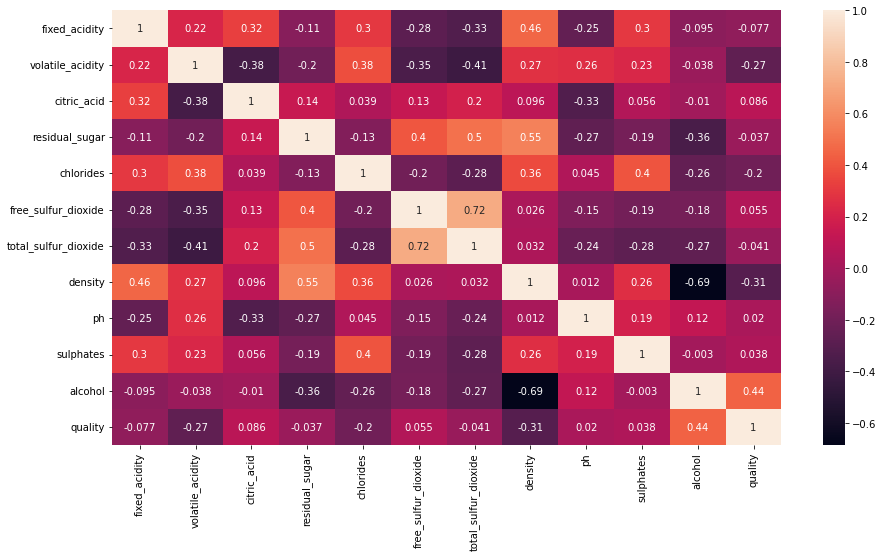

In [10]:
corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

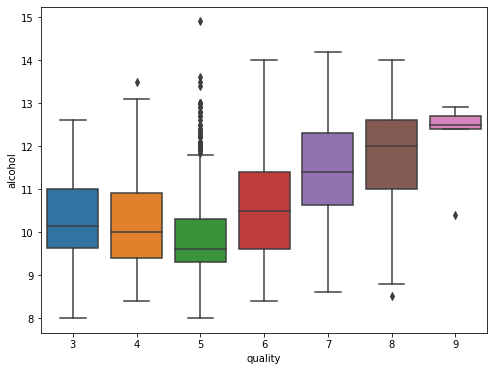

In [11]:
# Let's check through a box plot the relation quality/alcohol

var = 'quality'
relation = pd.concat([df['alcohol'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='alcohol', data=relation)

# Its an interesting figure here, we can see that better the quality is, the range of wine alcohol is very limited.
# There are not many outliers in this figure except for the wines rated at 5.

In [12]:
# not many values got the grade 9 so that can explains why

# Interesting to note that we have none of the wine that are rated under 3 or 10.
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


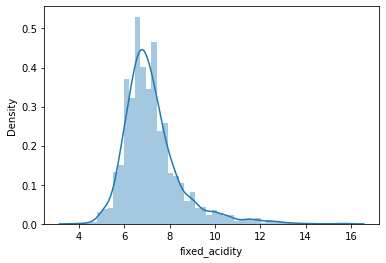

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


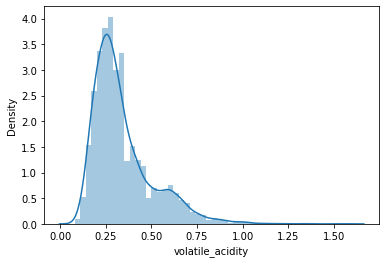

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


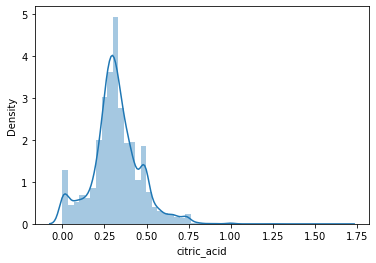

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


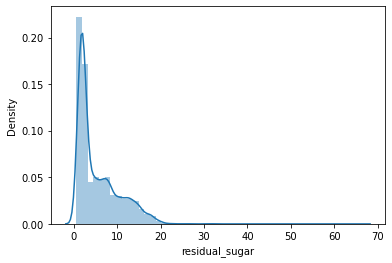

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


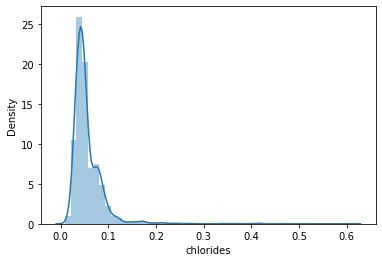

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


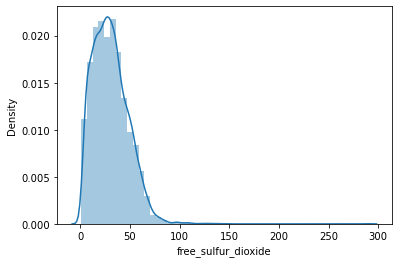

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


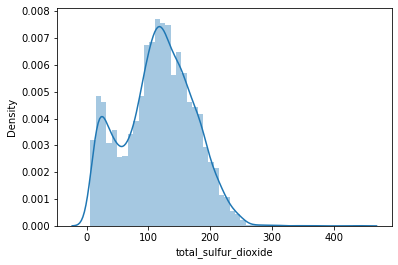

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


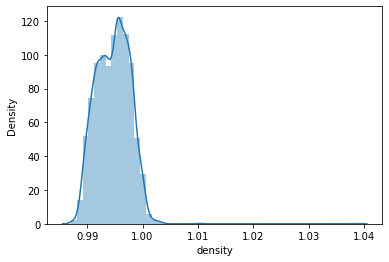

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


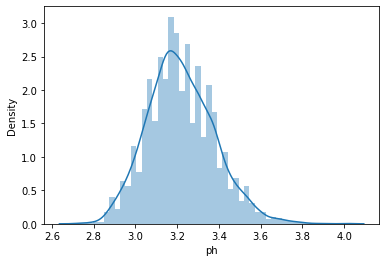

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


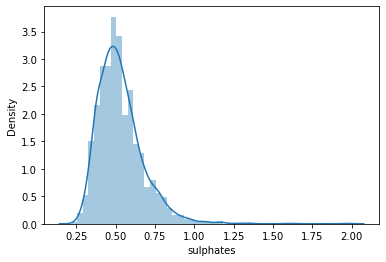

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


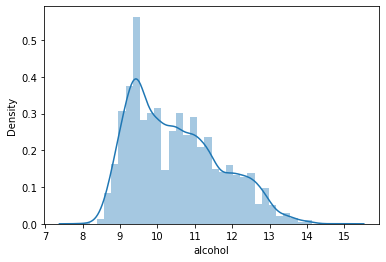

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


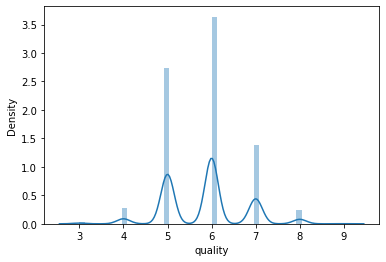

In [13]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

    
# We can notice here that every plot has a normal distribution

# Feature engineering

In [14]:
# Notice that I dont want to keep the wine type in the process because I want to determine the quality based on - 
# - the composant.

df2 = df.copy()

In [15]:
X = df2.drop(['quality', 'type'], axis=1)
y = df2['quality']
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

## Trying out different models and look at the best one

### Scaling the data

In [18]:
# I do not use it in the model later because it does not improve the score

from sklearn.preprocessing import MinMaxScaler

df_MM = df.copy()
# X = df_MM.drop(['quality', 'type'], axis=1)
# y = df_MM['quality']

# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)
# df_MM

### Linear regression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train_num, y_train)

LinearRegression()

In [21]:
# Score is very low, which I was expecting because this is not the best model.

model.score(X_test_num, y_test)

0.3286991700949502

In [22]:
predictions = model.predict(X_test_num)

In [23]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.3286991700949502, 0.5581000403982365, 0.7102036518552547)

In [24]:
# I just want to try to remove 2 columns and see if the score improves or not
# these 2 columns below have the lowest correlation with quality

cols_removed = df2[['volatile_acidity','density']]

In [25]:
# Worst

X = df2.drop(cols_removed, axis=1).drop(['quality', 'type'], axis=1)
y = df2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

model = LinearRegression()
model.fit(X_train_num, y_train)

model.score(X_test_num, y_test)

0.21704446295934032

### KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train_num, y_train)

KNeighborsRegressor(n_neighbors=15)

In [27]:
knn.score(X_test_num, y_test)

0.14144165701678302

In [28]:
predictions = model.predict(X_test_num)

In [29]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.21704446295934032, 0.5853975587142146, 0.7604270272690399)

### Random Forest Regression

In [30]:
forest = RandomForestRegressor()

In [31]:
forest.fit(X_train_num, y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test_num, y_test)

0.4912827606430028

In [33]:
predictions = model.predict(X_test_num)

In [34]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.21704446295934032, 0.5853975587142146, 0.7604270272690399)

### Random Forest classifier

In [35]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test_num, y_test)

0.6646153846153846

In [36]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.21704446295934032, 0.5853975587142146, 0.7604270272690399)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_num, y_train)
log.score(X_train_num, y_train)

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4702713103713681

# Trying out a new solution

Since the first model doesn't work due to the lack of Data, I decided to bucket my target. Below 5 is going to be 1, 5 is going to be 2 and above 3.

In [38]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [39]:
def bucket_values(value):
    if value < 6:
        return 0
    # elif value == 6:
      # return 2
    else:
        return 1

In [40]:
df3 = df.copy()
df3['quality'] = df3['quality'].apply(bucket_values)
df3

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,white


### Now let's perform the ml again to see if we get better result

In [41]:
df3['quality'].value_counts()

1    4113
0    2384
Name: quality, dtype: int64

### Random Forest Regression

In [42]:
X = df3.drop(['quality', 'type'], axis=1)
y = df3['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [43]:
forest = RandomForestRegressor()
forest.fit(X_train_num, y_train)
forest.score(X_test_num, y_test)

0.41679484668280664

### Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train_num, y_train)
model.score(X_test_num, y_test)

0.1928551775921431

I won't try all of them since the results are still very low

# Another solution

After reflexion, the decision to mix both df white and red was maybe a mistake since the characteristics are very different. I will not concat them and try again to perform ml on the white df

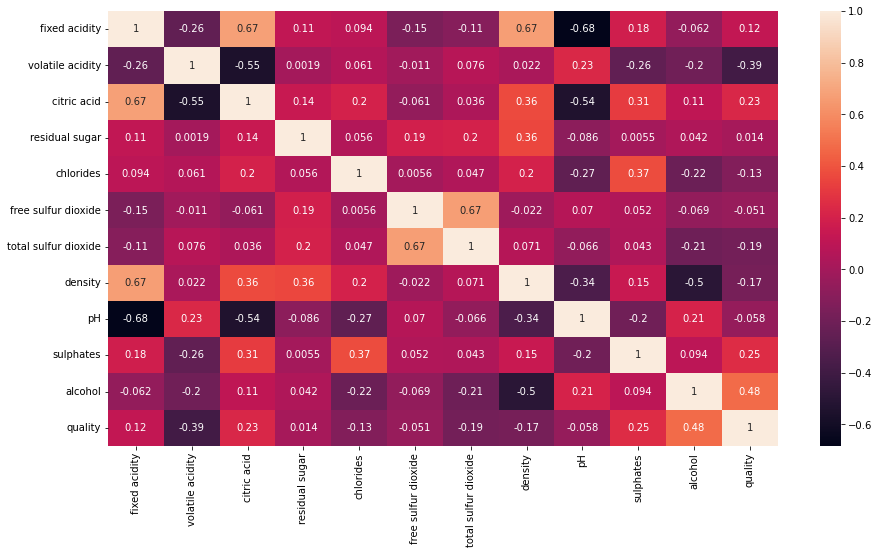

In [45]:
corr_matrix=df_r.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

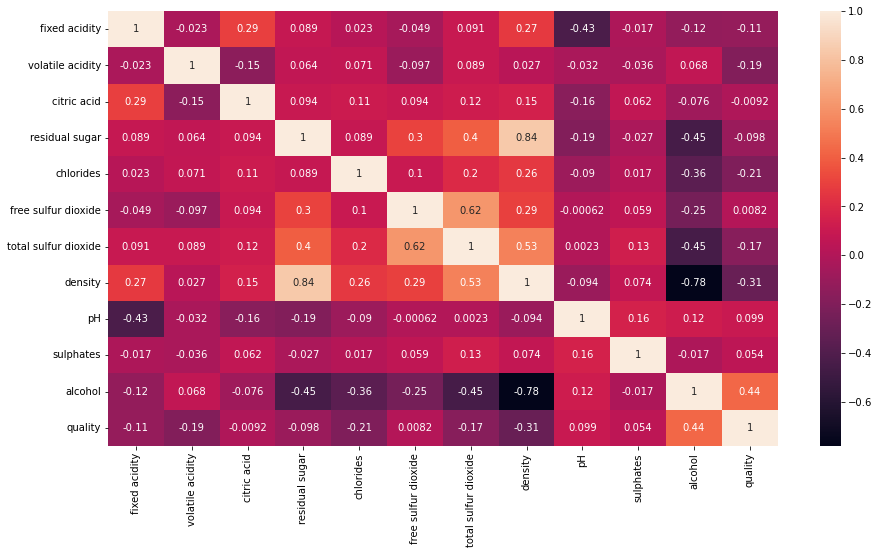

In [46]:
corr_matrix=df_w.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Just want to show this 2 correlation matrix to show my point. Here we can clearly see that the features related to quality are not exactly the same. here are some exemples of some features that have very different correlation.
- sulphates
- volatile acidity
- density 

In [47]:
df_r.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [48]:
df_r

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [49]:
# I consider here that values lower than 6 are low quality, = 6 is average and above great quality

def bucket_values_w(value):
    if value < 6:
        return 0
    elif value == 6:
        return 2
    else:
        return 1

In [50]:
df4 = df_r.copy()
df4['quality'] = df4['quality'].apply(bucket_values_w)
df4

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,red


In [51]:
# checking the repartition

df4['quality'].value_counts()

0    744
2    638
1    217
Name: quality, dtype: int64

In [52]:
X = df4.drop(cols_removed, axis=1).drop(['quality', 'type'], axis=1)
y = df4['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

### Linear Regression

In [53]:
linear = LinearRegression()
linear.fit(X_train_num, y_train)
linear.score(X_test_num, y_test)

0.18342274597198716

### Logistic Regression

In [54]:
# result has improved a lot

log = LogisticRegression()
log.fit(X_train_num, y_train)
log.score(X_test_num, y_test)

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.609375

### Random Forest Regressor

In [55]:
Ranreg = RandomForestRegressor()
Ranreg.fit(X_train_num, y_train)
Ranreg.score(X_test_num, y_test)

0.4241528141797344

### Random Forest Classifier

In [56]:
# result is way better here

Ranclass = RandomForestClassifier()
Ranclass.fit(X_train,y_train)
Ranclass.score(X_test_num, y_test)

0.7375

### KNN

In [57]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train_num, y_train)
knn.score(X_test_num, y_test)

0.057859120726163615

In [58]:
round(knn.score(X_test_num, y_test),3)

0.058

In [59]:
# Considering the results, I will keep Random Forest Classifier

results = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression','Random Forest Regressor', 'Random Forest Classifier','KNN'],
    'Score': [round(linear.score(X_test_num, y_test),3),round(log.score(X_test_num, y_test),3),round(Ranreg.score(X_test_num, y_test),3),round(Ranclass.score(X_test_num, y_test),3),round(knn.score(X_test_num, y_test),3)]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.738,Random Forest Classifier
0.609,Logistic Regression
0.424,Random Forest Regressor
0.183,Linear Regression
0.058,KNN


# Doing the same with the white wine dataset 

Now that we found a way to analyze our data, we can do the same for the other df and hope we'll get great results as well

In [60]:
# We already know what it is about so I will skip the analyzing part

df5 = df_w.copy()
df5.columns = [column.lower().replace(' ', '_') for column in df5.columns]

def bucket_values_w(value):
    if value < 6:
        return 0
    elif value == 6:
        return 2
    else:
        return 1
    
df5['quality'] = df5['quality'].apply(bucket_values_w)

In [61]:
df5

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,white


In [62]:
# Directly proceeding to perform the models

X = df5.drop(cols_removed, axis=1).drop(['quality', 'type'], axis=1)
y = df5['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [63]:
X

,fixed_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,ph,sulphates,alcohol
0,7.0,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2
4894,6.6,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6
4895,6.5,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4
4896,5.5,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8


In [80]:
X['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

### Linear Regression

In [65]:
linear2 = LinearRegression()
linear2.fit(X_train_num, y_train)
linear2.score(X_test_num, y_test)

0.05657876678114637

### Logistic Regression

In [66]:
log2 = LogisticRegression()
log2.fit(X_train_num, y_train)
log2.score(X_test_num, y_test)

/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4704081632653061

### Random Forest Regressor

In [67]:
Ranreg2 = RandomForestRegressor()
Ranreg2.fit(X_train_num, y_train)
Ranreg2.score(X_test_num, y_test)

0.3449233495815297

### Random Forest Classifier

In [68]:
Ranclass2 = RandomForestClassifier()
Ranclass2.fit(X_train,y_train)
Ranclass2.score(X_test_num, y_test)

0.7357142857142858

### KNN

In [69]:
knn2 = KNeighborsRegressor(n_neighbors=15)
knn2.fit(X_train_num, y_train)
knn2.score(X_test_num, y_test)

0.02712066065892238

In [70]:
# Again Random Forest Classifier appears to be the best.

results2 = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression','Random Forest Regressor', 'Random Forest Classifier','KNN'],
    'Score': [round(linear2.score(X_test_num, y_test),3),round(log2.score(X_test_num, y_test),3),round(Ranreg2.score(X_test_num, y_test),3),round(Ranclass2.score(X_test_num, y_test),3),round(knn2.score(X_test_num, y_test),3)]})

result_df2 = results2.sort_values(by='Score', ascending=False)
result_df2 = result_df2.set_index('Score')
result_df2

,Model
Score,
0.736,Random Forest Classifier
0.470,Logistic Regression
0.345,Random Forest Regressor
0.057,Linear Regression
0.027,KNN


In [71]:
def predict_wine_quality():
    
    fixed_acidity = float(input("Enter the fixed acidity of the wine: "))
    citric_acid = float(input("Enter the citric acid content of the wine: "))
    residual_sugar = float(input("Enter the residual sugar content of the wine: "))
    chlorides = float(input("Enter the chlorides content of the wine: "))
    free_sulfur_dioxide = float(input("Enter the free sulfur dioxide content of the wine: "))
    total_sulfur_dioxide = float(input("Enter the total sulfur dioxide content of the wine: "))
    ph = float(input("Enter the pH value of the wine: "))
    sulphates = float(input("Enter the sulphates content of the wine: "))
    alcohol = float(input("Enter the alcohol content of the wine: "))
    
    # create a dataframe with the input values
    input_data = pd.DataFrame([[fixed_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, 
                                total_sulfur_dioxide, ph, sulphates, alcohol]],
                              columns=['fixed_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
                                       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'])
    
    # make the prediction using the trained model
    predicted_quality = Ranclass2.predict(input_data)
    
    final_res = print('Based on the values you provide, the quality of your wine is at 75% sure : ', predicted_quality[0],".")
    return final_res

In [74]:
predict_wine_quality()

Enter the fixed acidity of the wine: 2
Enter the citric acid content of the wine: 2
Enter the residual sugar content of the wine: 2
Enter the chlorides content of the wine: 2
Enter the free sulfur dioxide content of the wine: 22
Enter the total sulfur dioxide content of the wine: 2
Enter the pH value of the wine: 2
Enter the sulphates content of the wine: 2
Enter the alcohol content of the wine: 2
Based on the values you provide, the quality of your wine is at 75% sure :  0 .


/Users/accountmanager/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- pH
Feature names seen at fit time, yet now missing:
- ph

  warnings.warn(message, FutureWarning)


# Conclusion

I will use Random Forest Classifier in order to predict the quality since it is the model that performs the best.